In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2
import pickle

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
fashion_mnist_labels = {
    0:'T-shirt / top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

# Data Loading Function

In [4]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [5]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [6]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D by flattening image data from 28x28 to 1x784

In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

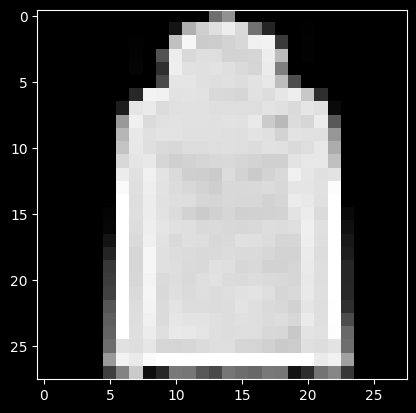

4


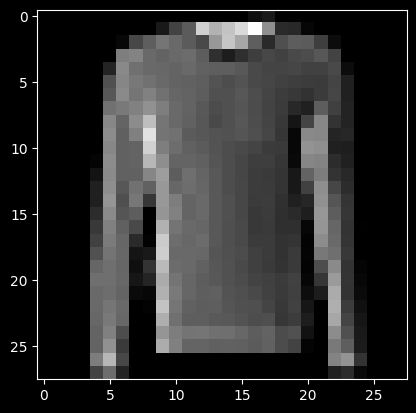

2


In [9]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

In [10]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 32)) #dense layer 1 with 32 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(32,32)) #dense layer 2 with 32 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(32,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)

model.save('fashion_mnist_2.model')

model.save_train_dict('train_dict.pkl')

epoch: 1
step: 0, acc: 0.070, loss: 2.428 (data_loss: 2.428, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.734, loss: 0.695 (data_loss: 0.695, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.797, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.836, loss: 0.503 (data_loss: 0.503, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.844, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.781, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.859, loss: 0.353 (data_loss: 0.353, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.820, loss: 0.513 (data_loss: 0.513, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.836, loss: 0.562 (data_loss: 0.562, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.859, loss: 0.448 (data_loss: 0.448, reg_loss: 0.000000), lr: 0.0005652911249

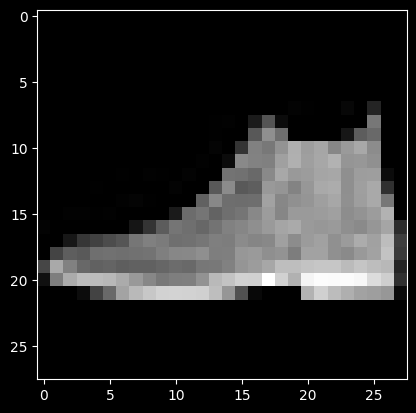

In [11]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [12]:
print(model.predict(X_test[0]))

[[2.56768105e-05 3.80346087e-06 8.69034186e-06 1.23207737e-07
  6.41456937e-07 1.10736447e-01 6.28785720e-05 2.42677538e-01
  5.84471703e-03 6.40639484e-01]]


In [13]:
print(np.argmax(model.predict(X_test[0])))
print(y_test[0])

9
9


In [14]:
for layer in model.layers:
    print(layer.output)

[[ 4.88429914 13.36424315 -2.11753341  0.85141328  5.16968361 -4.89465959
   5.83362229  5.4086523  14.71111861  3.84748499 12.52687275 -1.85698298
   4.40799127  0.98257122  7.10715477  4.25337146  6.32311206 -6.03536458
   2.21711951  8.96475046  2.28094325 -3.69739132  6.57494964  5.56847654
   2.51945258  3.64753187  6.70511156 12.04692986  9.11987188 11.41528556
   5.05005068  3.65159512]]
[[ 4.88429914 13.36424315  0.          0.85141328  5.16968361  0.
   5.83362229  5.4086523  14.71111861  3.84748499 12.52687275  0.
   4.40799127  0.98257122  7.10715477  4.25337146  6.32311206  0.
   2.21711951  8.96475046  2.28094325  0.          6.57494964  5.56847654
   2.51945258  3.64753187  6.70511156 12.04692986  9.11987188 11.41528556
   5.05005068  3.65159512]]
[[ 3.88792167  4.85430023  4.07406798 -1.130141    0.63476174  2.61189294
  11.2438457   8.23122325  6.86303065  4.6646549   3.65898541  0.09867775
   2.64277665  9.95413629  3.60351565 -3.00682488  4.26788921  4.13388529
  -1.0

# Save Sample figure animations
These animations are for each sample and display the outputs from each layer

# Calculate layer output averages for each sample by class

# Plot class sample layer outputs/predictions averages

# Plot all training data for each dense layer

%matplotlib tk

def make_plots():
    #TODO: add parameter to give training data file
    with open("train_dict.pkl", 'rb') as f:
        train_dict = pickle.load(f)
        
    #TODO: create axes programatically from train_dict
    #this is hardcoded from model (3 dense layers)
    fig = plt.figure(figsize=(15,5))
    ax0 = fig.add_subplot(131)
    ax1 = fig.add_subplot(132)
    ax2 = fig.add_subplot(133)
    
    #TODO: assign this variable based on root keys in
    ## train_dict. The root keys are the epochs, the sum
    ## is the number of epochs
    epochs = 5 #this is hardcoded from are recently ran model
    
    for epoch in range(1,epochs+1):
        print("Epoch", epoch)
        for step in train_dict[epoch]:
            #print every 10 steps
            if (step % 10) == 0:
                print("Step", step)
                
                ### Display Layer weights ###
                #TODO: generate graph programmatically
                weights_0 = train_dict[epoch][step][0]["weights"]
                weights_1 = train_dict[epoch][step][1]["weights"]
                weights_2 = train_dict[epoch][step][2]["weights"]
                
                ax0.imshow(weights_0, cmap='RdYlGn')
                ax1.imshow(weights_1, cmap='RdYlGn')
                ax2.imshow(weights_2, cmap='RdYlGn')
                
                fig.suptitle(f"Fashion MNIST Dense NN Epoch: {epoch} Step: {step}", fontsize=20)
                
                ax0.set_title("Layer 1 weights\nin 784, out 32")
                ax1.set_title("Layer 2 weights\nin 32, out 32")
                ax2.set_title("Layer 3 weights\nin 32, out 10")
                
                ax0.title.set_fontsize(10)
                ax1.title.set_fontsize(10)
                ax2.title.set_fontsize(10)
                
                ax0.set_aspect(0.05)
                
                ax0.set_ylim(0,784)
                
                fig.set_size_inches(8,8)
                
                plt.pause(0.01)
                ax0.clear()
                ax1.clear()
                ax2.clear()
                
    plt.show()

import pickle
make_plots()

In [15]:
class Visualize_Categorical_Layers:
    def __init__(self, *, viz_limit=10, path=None, X, y, model, num_categories, image_dimensions=None,fig):
        import os
        
        self.viz_limit = viz_limit
        self.path = path
        self.X = X
        self.y = y
        self.model = model
        self.image_dimensions = image_dimensions
        self.fig = fig
        self.num_layers = len(self.model.layers)
        self.num_categories = num_categories
        
        
        if self.path is not None:
            if not os.path.exists(self.path):
                os.makedirs(self.path)
              
    def animate_categorical(self, i):
        import matplotlib.pyplot as plt
        
        self.fig.clear()
        self.visualize_layers_output_Categorical(i, self.fig)
        
        if self.path is not None:
            plt.savefig(f'{self.path}/class_{self.y[i]}-{i}.png')
        
        return self.fig
            
            
    def visualize_layers_output_Categorical(self, sample_num, fig):
        import numpy as np
        
        input_data = self.X[sample_num]
        output_truth = self.y[sample_num]
        prediction = self.model.predict(input_data)

        pred_class = np.argmax(prediction)

        if pred_class == output_truth:
            title_text = f"Correct! Prediction {pred_class}, Truth {output_truth}"
            fig.suptitle(title_text, fontsize=20, color="g")
        else:
            title_text = f"Wrong! Prediction {pred_class}, Truth {output_truth}"
            fig.suptitle(title_text, fontsize=20, color="r")

        #Generate Axes#
        #axis for sample
        ax0 = plt.subplot2grid((1,self.num_layers+1), (0,0), rowspan=1, colspan=1)

        #axes for the layers
        ax_list = [] #holds axes generated in loop
        num_layers = len(self.model.layers) #get number of layers
        for i in range(1, num_layers+1):
            ax_list.append(plt.subplot2grid((1,num_layers+1), (0,i), rowspan=1, colspan=1))

        #check if input data is an image
        #if it is then print it
        if(self.image_dimensions is not None):
            if isinstance(self.image_dimensions, tuple):
                ax0.imshow(input_data.reshape(self.image_dimensions[0], self.image_dimensions[1]),\
                           cmap='gray')

        for i in range(num_layers):
            #Gather axis data from layer outputs#
            #output is a vector
            #rotate to display vertically
            #rotates counterclockwise
            layer_data = np.rot90(self.model.layers[i].output, k=3, axes=(0,1))
            if min(layer_data) < 0:
                ax_list[i].imshow(layer_data, cmap='RdYlGn') #set layer data
                ax_list[i].set_title(f"L{i+1}") #set title
            else:
                ax_list[i].imshow(layer_data, cmap='YlGn')
                ax_list[i].set_title(f"L{i+1} Activated")

        ax0.axis("off")
        #plt.show()
        
    
    def visualize_layers_averages_Categorical(self):
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt

        #get every layer from every class prediction
        #example: class 0 was predicted using 6 layers
        ## we want to get every layers output that was used 
        ## in the prediction of class 0 samples
        ## so if we had 8 class 0 samples and each were predicted
        ## using 6 layers then each key (0 - 5) within the
        ## class 0 key would have 8 indices
        ## one for each sample predicted
        
        #Build layer data by class dictionary
        layer_data_by_class = {}
        for i in range(self.num_categories):
            layer_data_by_class[i] = {}
            #at the class key generate number of array keys
            #for number of layers in model
            for j in range(self.num_layers):
                layer_data_by_class[i][j] = []

        #loop the X set by index
        for data_n in tqdm(range(len(self.X))):
            self.model.predict(self.X[data_n]) #run predict on sample
            truth = self.y[data_n] #find truth for sample

            #add layer outputs to class label key
            for layer_num in range(self.num_layers):
                layer_data_by_class[truth][layer_num].append(self.model.layers[layer_num].output)

        #calculate averages
        for class_num in layer_data_by_class:
            for layer_num in layer_data_by_class[class_num]:
                layer_data_by_class[class_num][layer_num] = np.mean(layer_data_by_class[class_num][layer_num], axis=0)


        ### Plot Averages ####

        #holds sample data representation per class (used for images)
        #this is used to show an example class image in the figure
        class_sample_dict = {}
        if self.image_dimensions is not None:
            #select a sample representation for each class
            class_sample_dict_idx = {} #holds found sample class representation
            #loop all classes and find 1 sample per class for representation
            for i, value in enumerate(self.y):
                if value not in class_sample_dict_idx:
                    #load unique sample class representative 
                    #in dictionary
                    class_sample_dict_idx[value] = i
                    #at the class key assign sample data
                    #from the found index
                    class_sample_dict[value] = self.X[i]


        for class_n in class_sample_dict:
            fig = plt.figure(figsize=(12,12))
            fig.suptitle(f'Average values for Class {class_n}')

            #Generate Axes#
            #axis for sample
            ax0 = plt.subplot2grid((1,self.num_layers+1), (0,0), rowspan=1, colspan=1)
                      
            #axes for the layers
            ax_list = [] #holds axes generated in loop
            for i in range(1, self.num_layers+1):
                ax_list.append(plt.subplot2grid((1,self.num_layers+1), (0,i), rowspan=1, colspan=1))

            #Gather axis data from layer output averages by sample class#
            #output is a vector
            #rotate to display vertically
            #rotates counterclockwise  
            for i in range(self.num_layers):
                #Gather axis data from layer outputs#
                #output is a vector
                #rotate to display vertically
                #rotates counterclockwise
                layer_data = np.rot90(layer_data_by_class[class_n][i], k=3, axes=(0,1))
                if min(layer_data) < 0:
                    ax_list[i].imshow(layer_data, cmap='RdYlGn') #set layer data
                    ax_list[i].set_title(f"L{i+1}") #set title
                else:
                    ax_list[i].imshow(layer_data, cmap='YlGn')
                    ax_list[i].set_title(f"L{i+1} (Activation)")

            #Display data#
            #display sample
            #check if input data is an image
            #if it is then print it
            if(self.image_dimensions is not None):
                if isinstance(self.image_dimensions, tuple):
                    ax0.imshow(class_sample_dict[class_n].reshape(self.image_dimensions[0], self.image_dimensions[1]),\
                               cmap='gray')

            ax0.axis("off")

            #save figure images in directory by class name
            if self.path is not None:
                if not os.path.exists(self.path):
                    os.makedirs(self.path)
                plt.savefig(f"{self.path}/{class_n}.png")
    


In [16]:
%matplotlib tk
from matplotlib import animation

fig = plt.figure(figsize=(12,12))

viz_obj = nnfs_module.Visualize_Categorical_Layers(viz_limit=10, path="layer_outs_2",\
                                       X=X_test, y=y_test, model=model, num_categories=10,\
                                       image_dimensions=(28,28), fig=fig)

anim = animation.FuncAnimation(viz_obj.fig, viz_obj.animate_categorical, frames=viz_obj.viz_limit)
plt.show(block=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3676.27it/s]


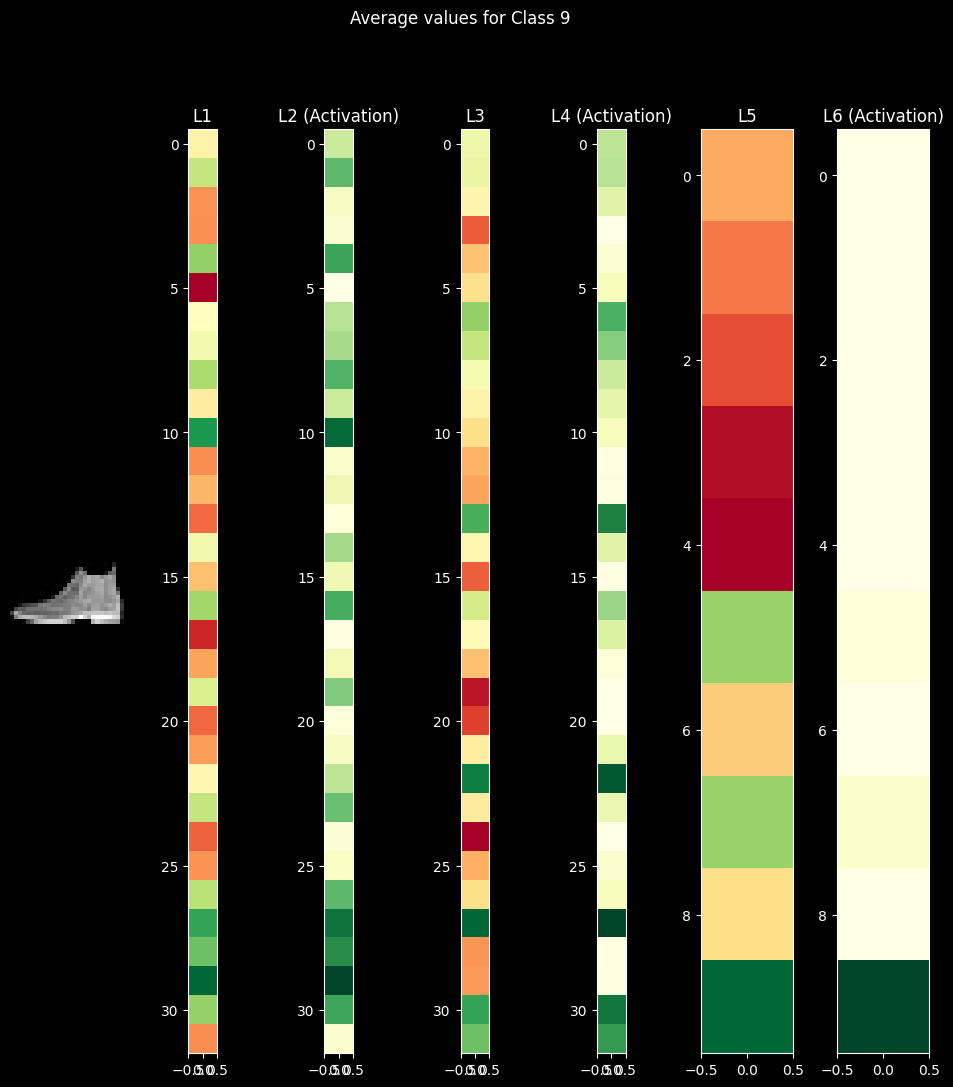

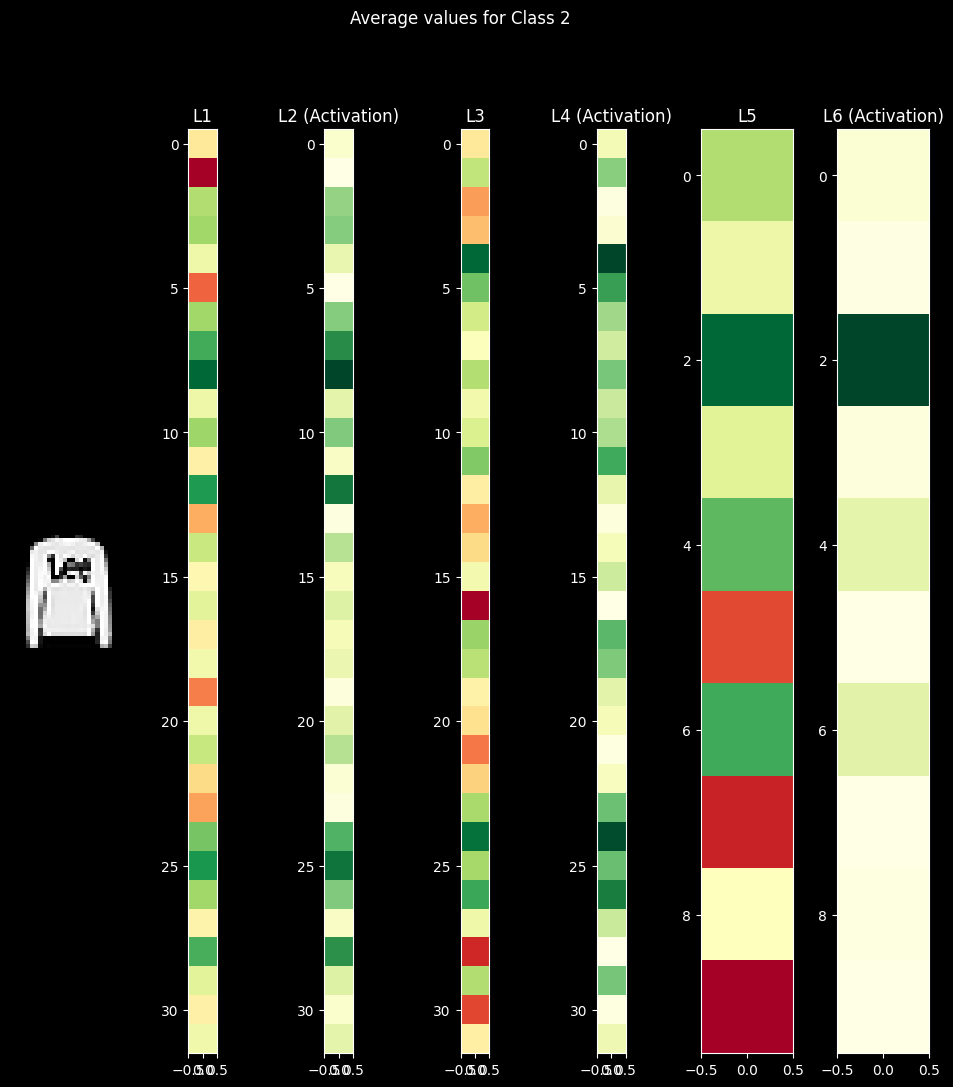

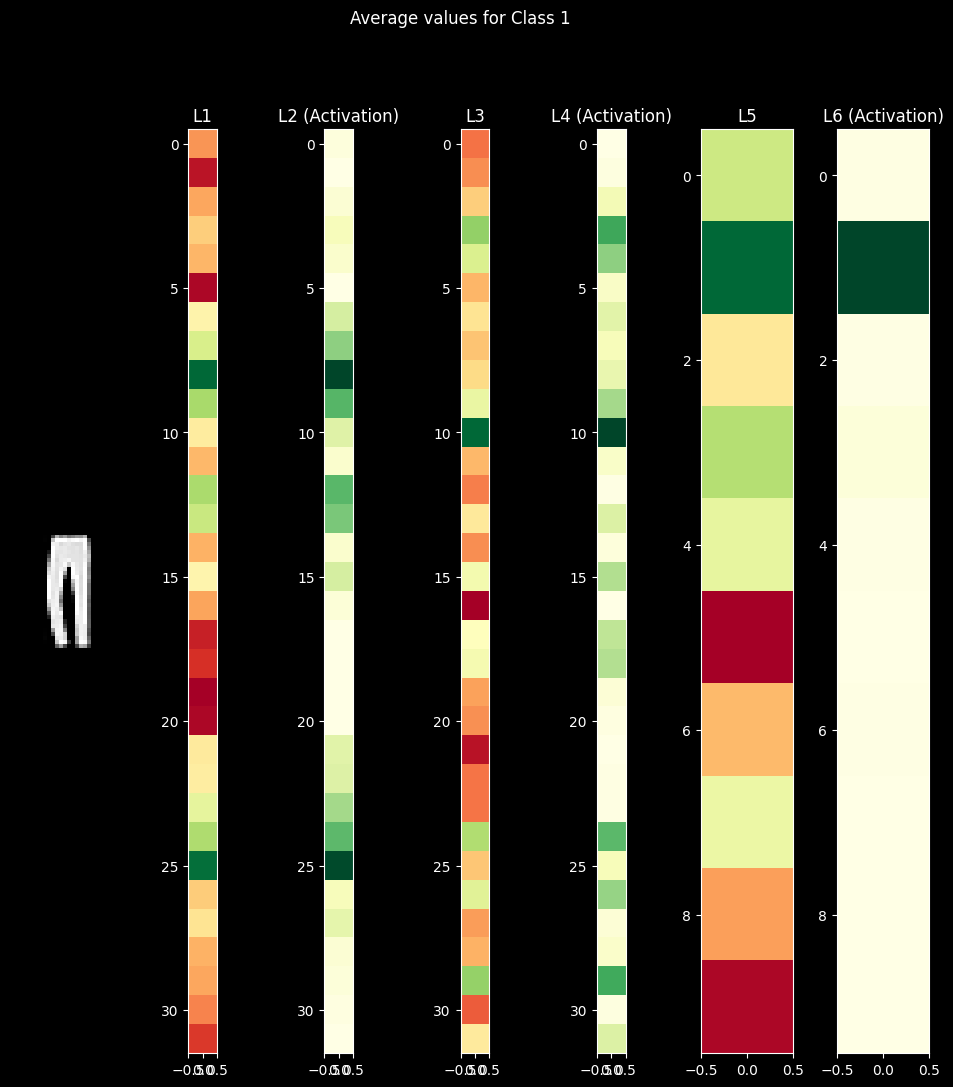

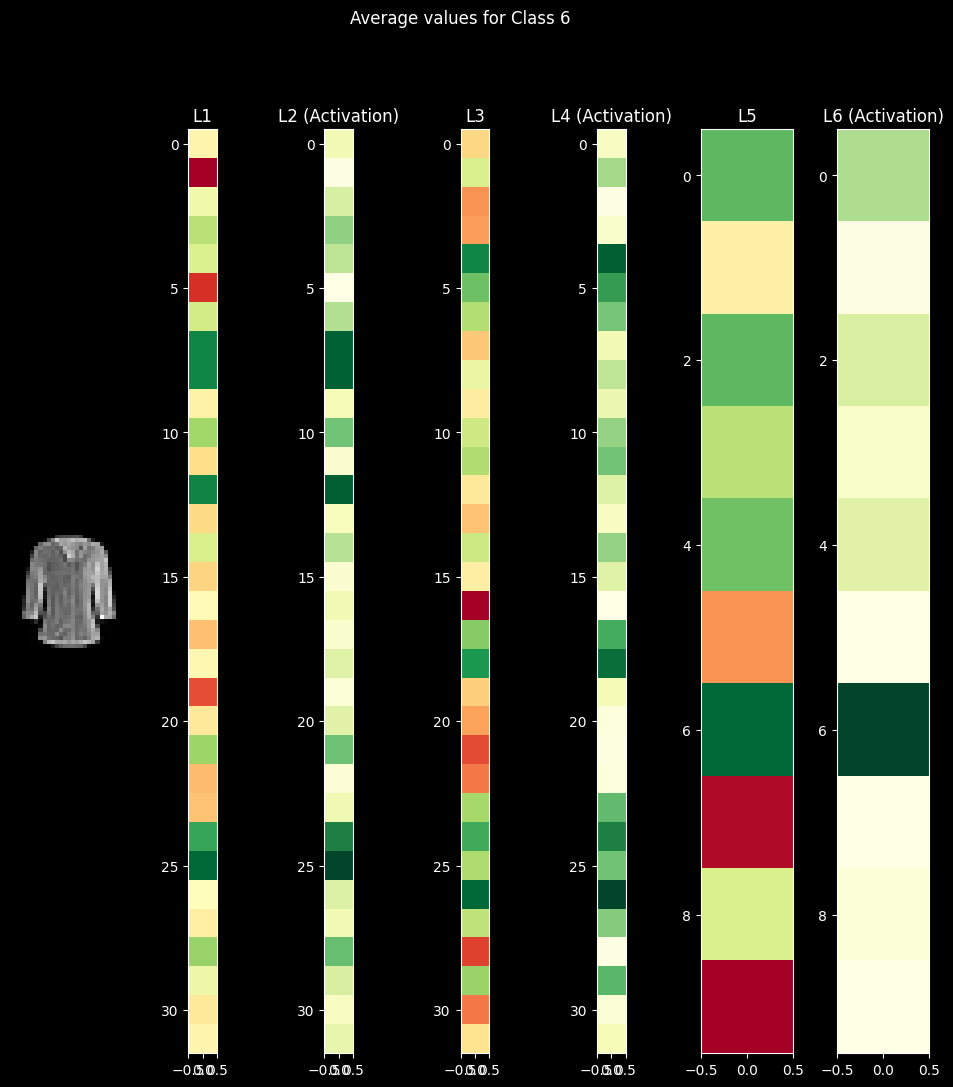

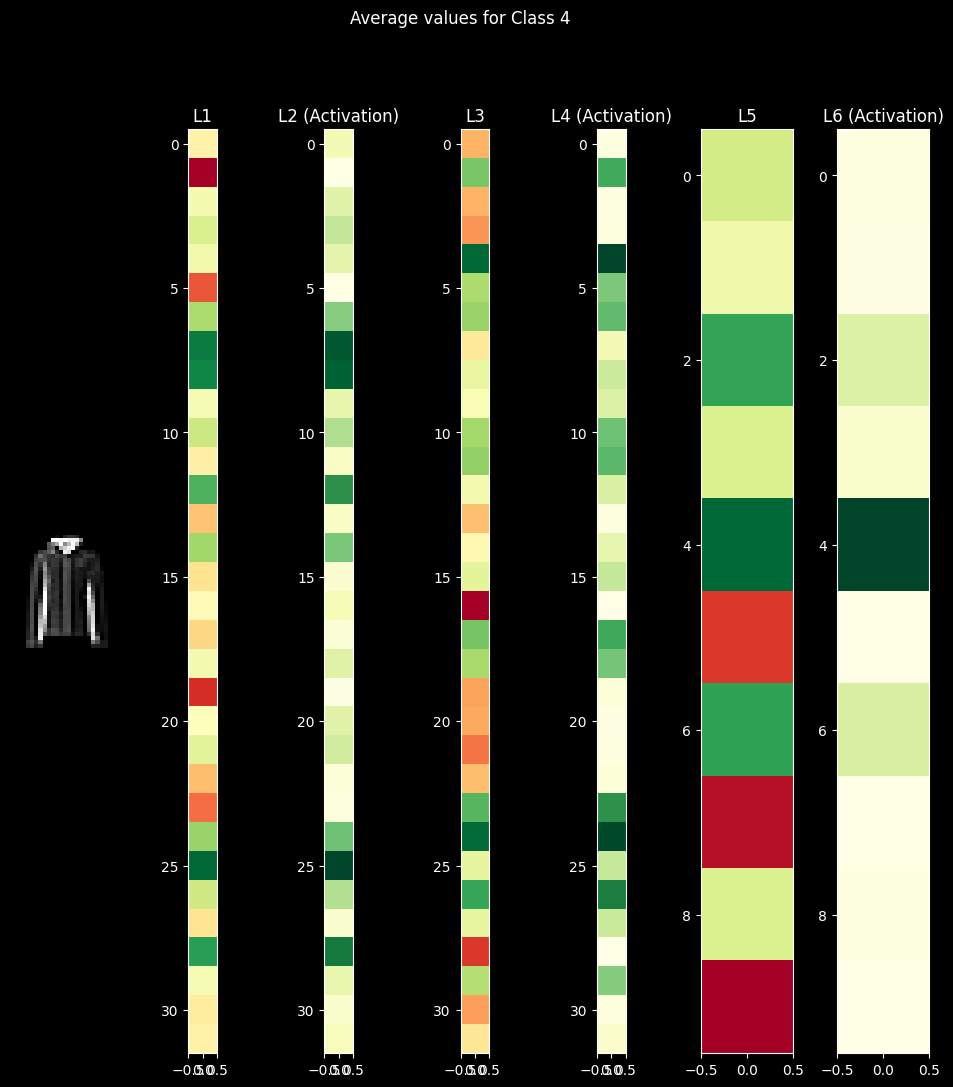

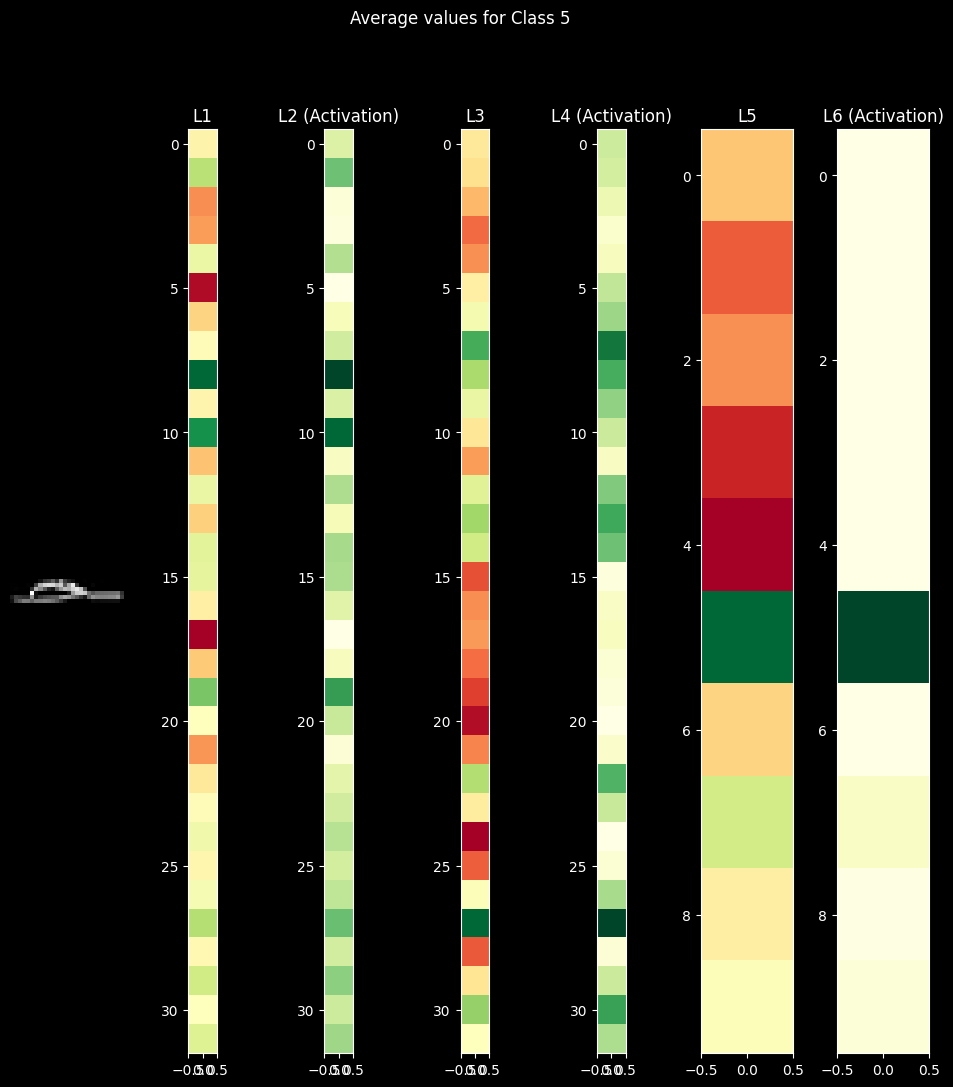

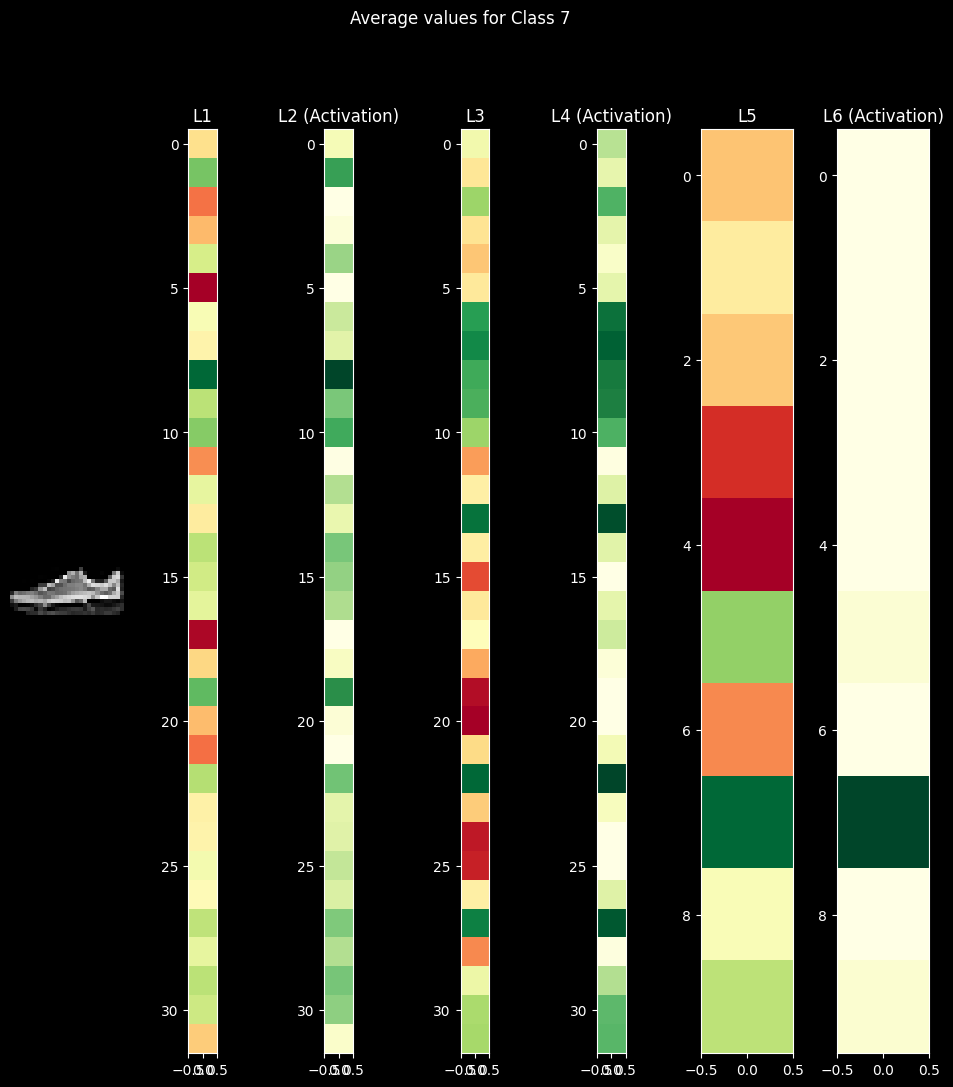

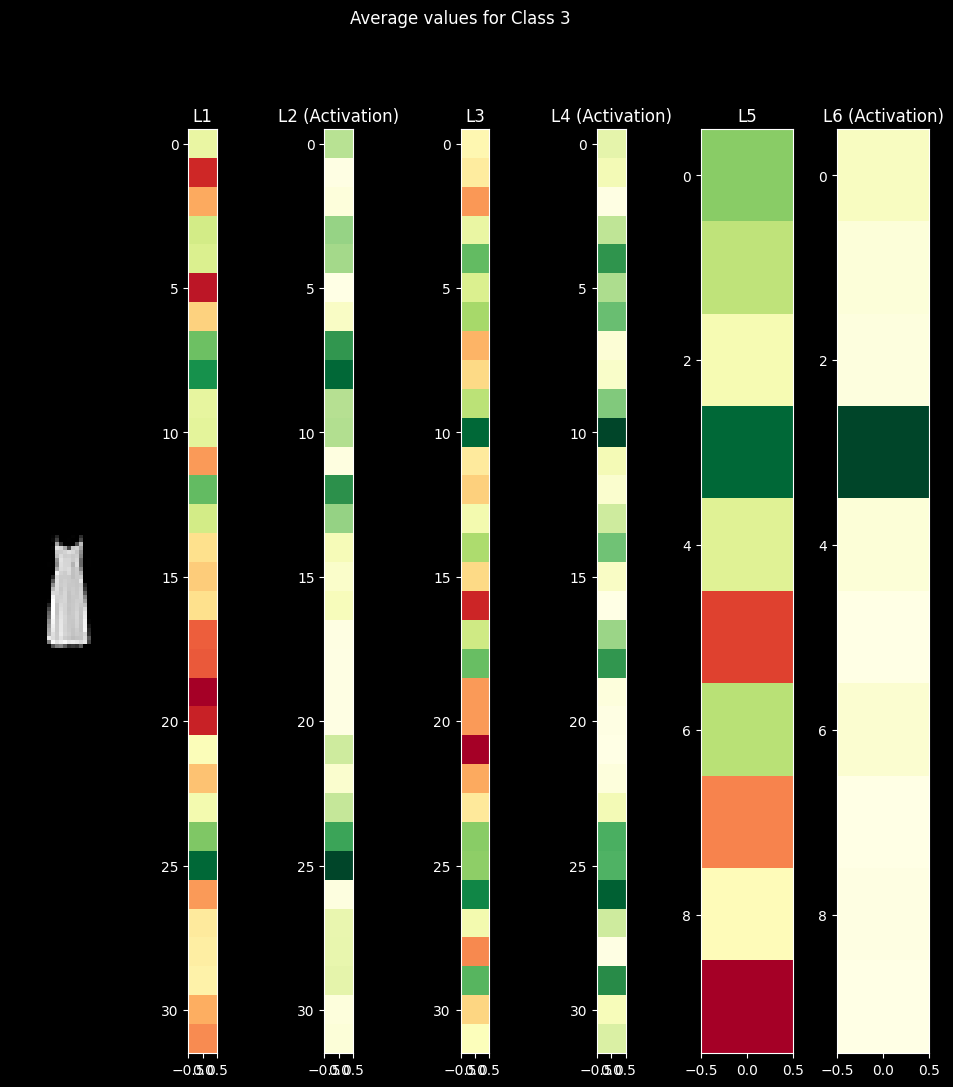

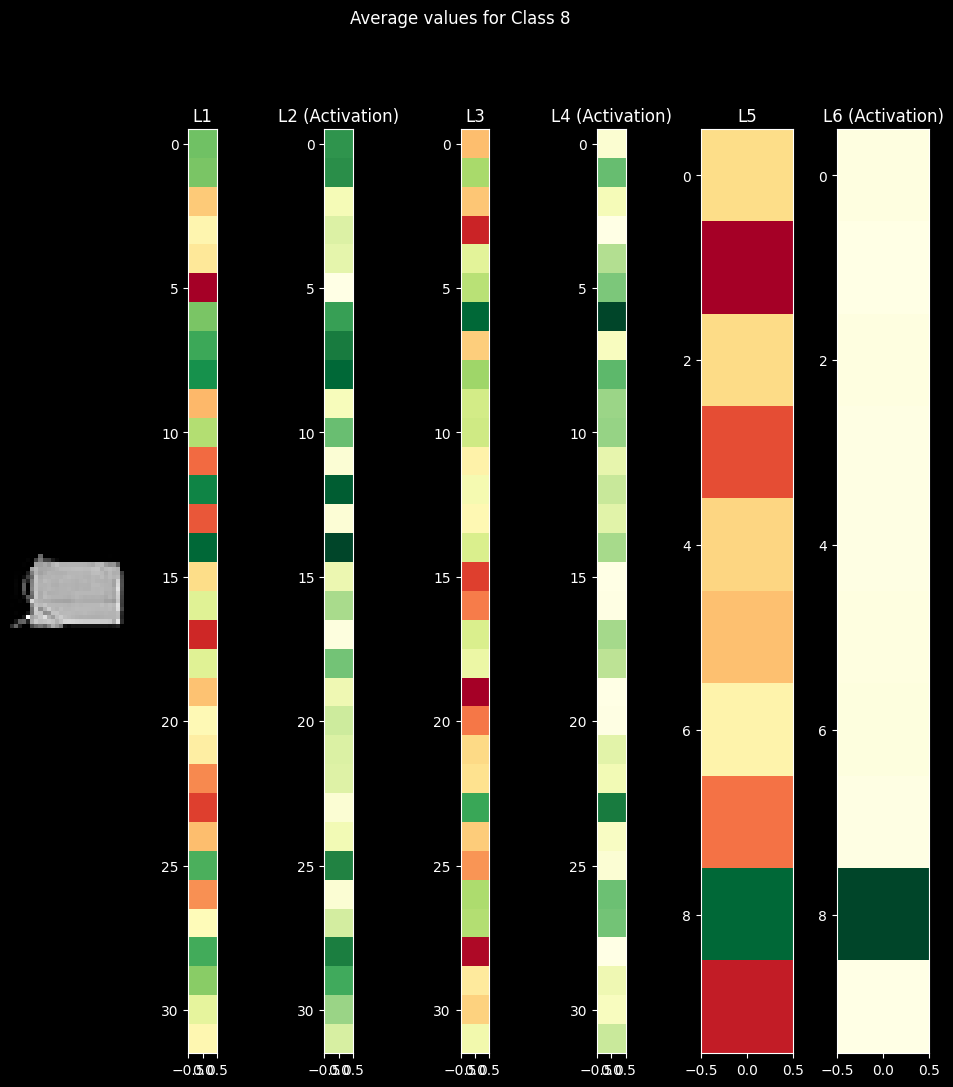

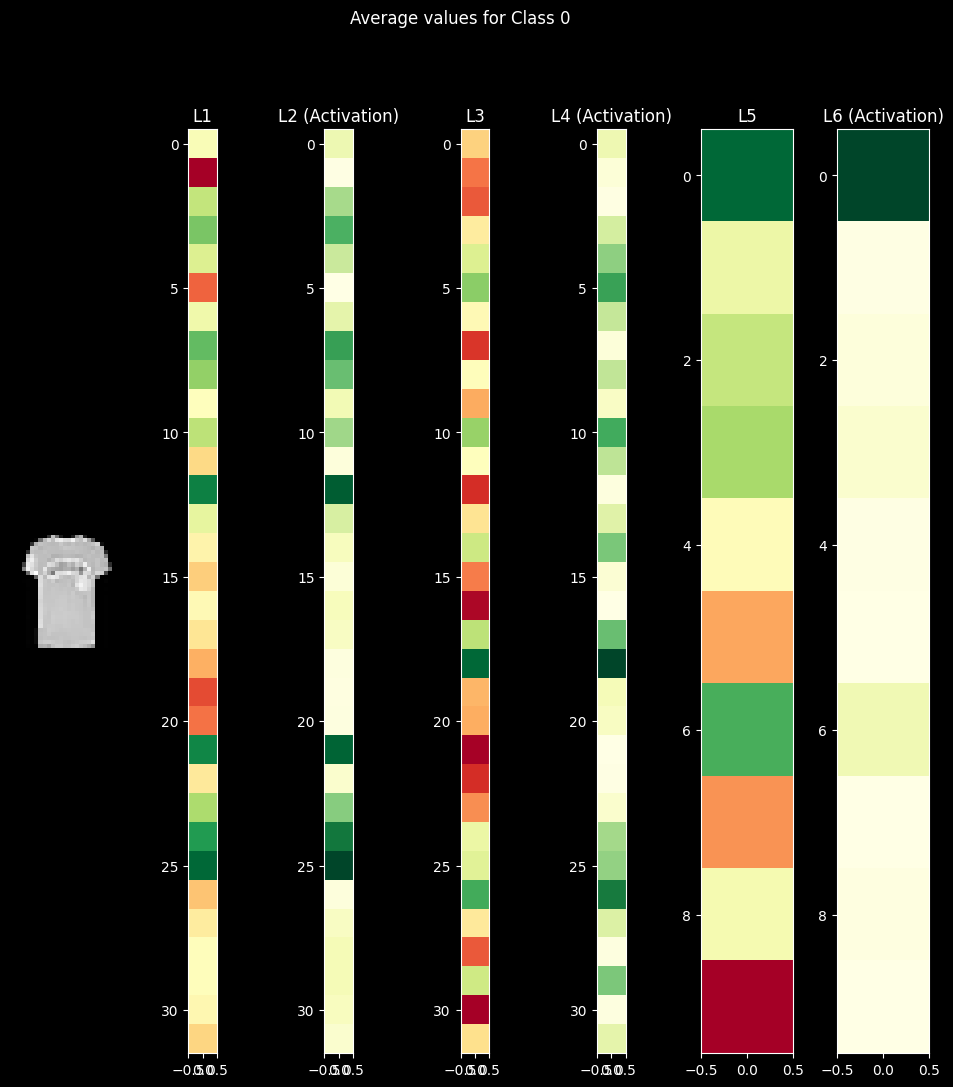

In [17]:
%matplotlib inline
viz_obj = nnfs_module.Visualize_Categorical_Layers(viz_limit=10, path="layer_avgs_2",\
                                       X=X_test, y=y_test, model=model, num_categories=10,\
                                       image_dimensions=(28,28), fig=fig)
viz_obj.visualize_layers_averages_Categorical()